**Copy images and annotation from drive**

In [1]:
%cp '/content/drive/My Drive/SIMS_Dataset/images.zip' /content/
%cp '/content/drive/My Drive/SIMS_Dataset/training.txt' /content/
%cp '/content/drive/My Drive/SIMS_Dataset/test.txt' /content/
%cp '/content/drive/My Drive/SIMS_Dataset/validation.txt' /content/
!unzip -qq images.zip -d /content/

print("Done Copying and Unzipping")

Done Copying and Unzipping


**Preprocessing** Did once and copied processed categories into drive for later usage

In [0]:
#making directories

!mkdir yolo_train/
!mkdir yolo_train/images
!mkdir yolo_train/labels

!mkdir yolo_test/
!mkdir yolo_test/images
!mkdir yolo_test/labels

!mkdir yolo_val/
!mkdir yolo_val/images
!mkdir yolo_val/labels

In [3]:
#separate images based on train,val and test and put corresponding files into 
#respective folder having images and labels as subfolders in it
import shutil
import os

def copy(filepath,dest_dir):
    with open(filepath) as fp:
        for line in fp:
            os.makedirs(dest_dir, exist_ok=True)  # succeeds even if directory exists.
            shutil.copy(line.replace('\n', ''), dest_dir+"images") #image
            shutil.copy(line.replace('.jpg\n', '.txt'), dest_dir+"labels") ##label
    print("Done: "+ filepath)
            
copy('./training.txt','yolo_train/')
copy('./validation.txt','yolo_val/')
copy('./test.txt','yolo_test/')

Done: ./training.txt
Done: ./validation.txt
Done: ./test.txt


In [0]:
#make Dataset folder and place above created folders here
!mkdir Dataset
!mv yolo_train/ Dataset/
!mv yolo_test/ Dataset/
!mv yolo_val/ Dataset/

In [14]:
#update paths of train,test,val

### replace ./images/0000.jpg to "/content/yolov3/Dataset/yolo_train/images/0000.jpg" 

def copy(filepath,newfile,binder):
    with open(filepath) as fp:
      print(filepath)
      for line in fp:
        in_file = line[2:]
        new = binder+in_file
        with open(newfile, "a") as f:
          f.write(new)

copy('training.txt','Dataset/yolo_train/yolo_train.txt',
     "/content/yolov3/Dataset/yolo_train/")

copy('test.txt','Dataset/yolo_test/yolo_test.txt',
     "/content/yolov3/Dataset/yolo_test/")

copy('validation.txt','Dataset/yolo_val/yolo_val.txt',
     "/content/yolov3/Dataset/yolo_val/")

training.txt
test.txt
validation.txt


Copy data and save into drive

In [0]:
#Copied dataset and relevant files to drive
!zip -r SIMS_Dataset_yolo.zip /content/yolov3/Dataset/
!cp /content/yolov3/SIMS_Dataset_yolo.zip '/content/drive/My Drive/SIMS_Dataset'

Preprocessing ended here

**Clone repository and install requirements**

In [6]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3/
!pip install -U -r requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9120, done.
remote: Total 9120 (delta 0), reused 0 (delta 0), pack-reused 9120
Receiving objects: 100% (9120/9120), 7.06 MiB | 9.49 MiB/s, done.
Resolving deltas: 100% (6285/6285), done.
/content/yolov3
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 2)) (1.18.4)
     |████████████████████████████████| 28.2MB 115kB/s 
Requirement already up-to-date: torch>=1.5 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (1.5.0+cu101)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (3.2.1)
Requirement already up-to-date: pycocotools in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 6)) (2.0.0)
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 2.1MB 52.7MB/s 
Requirement already up-to-date: tensorboard>=1.14 in /usr

**created sims_classes.names and sims.data files**

In [0]:
%cd yolov3

/content/yolov3


**Load Preprocessed Data from Drive**

In [0]:
#using copied/preprocessed data now
##!mkdir /content/yolov3/Dataset
%cp '/content/drive/My Drive/SIMS_Dataset/SIMS_yolo.zip' /content/yolov3/
!unzip SIMS_yolo.zip -d /content/yolov3/

In [0]:
#download pretrained weights
!. weights/download_yolov3_weights.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    681      0 --:--:-- --:--:-- --:--:--   681
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  236M    0  236M    0     0  53.4M      0 --:--:--  0:00:04 --:--:-- 88.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1291      0 --:--:-- --:--:-- --:--:--  1291
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  240M    0  240M    0     0  35.9M      0 --:--:--  0:00:06 --:--:-- 50.8M


In [0]:
#start training
!python3 train.py --batch 8 --epochs 60 --img-size 512 --data Dataset/sims.txt --cache-images --rec --cfg yolov3.cfg --name from_yolov3 --weights weights/yolov3.pt

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=8, bucket='', cache_images=True, cfg='yolov3.cfg', data='Dataset/sims.txt', device='', epochs=60, evolve=False, img_size=[512], multi_scale=False, name='from_yolov3', nosave=False, notest=False, rect=True, resume=False, single_cls=False, weights='weights/yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-05-06 04:43:12.184919: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 222 layers, 6.15991e+07 parameters, 6.15991e+07 gradients
Optimizer groups: 75 .bias, 75 Conv2d.weight, 72 other
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later,

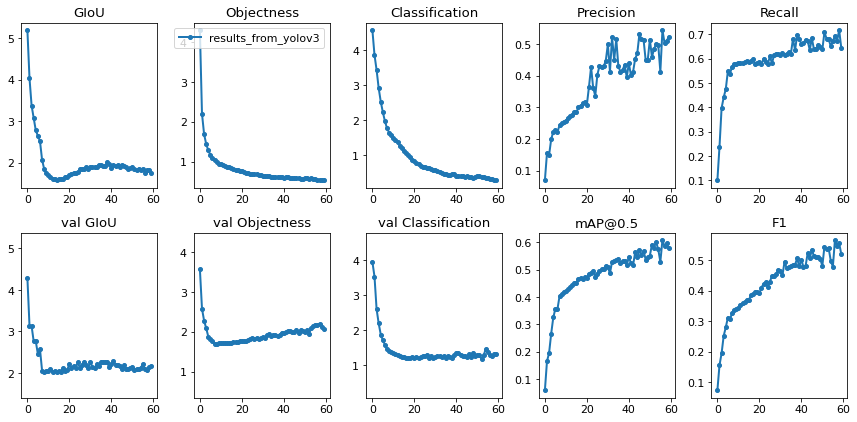

In [0]:
from utils import utils;
utils.plot_results()

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir=runs

In [0]:
!python3 detect.py --names Dataset/sims_classes.names --cfg yolov3.cfg --weights weights/best_from_yolov3.pt

Namespace(agnostic_nms=False, augment=False, cfg='yolov3.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='Dataset/sims_classes.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/best_from_yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 222 layers, 6.15991e+07 parameters, 6.15991e+07 gradients
image 1/5 data/samples/0011.jpg: 384x512 2 airliners, Done. (0.031s)
image 2/5 data/samples/0037.jpg: 384x512 4 trucks, 1 longvehicles, Done. (0.032s)
image 3/5 data/samples/0061.jpg: 384x512 8 cars, Done. (0.031s)
image 4/5 data/samples/0136.jpg: 384x512 14 chartereds, Done. (0.031s)
image 5/5 data/samples/0177.jpg: 384x512 1 cars, 2 boats, Done. (0.031s)
Results saved to /content/yolov3/output
Done. (0.759s)


In [0]:
#test on last model
!python3 test.py --data Dataset/sims_test.txt --cfg yolov3.cfg --batch-size 8 --weights weights/last_from_yolov3.pt --save-json --img-size 512

Namespace(augment=False, batch_size=8, cfg='yolov3.cfg', conf_thres=0.001, data='Dataset/sims_test.txt', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/last_from_yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 222 layers, 6.15991e+07 parameters, 6.15991e+07 gradients
Fusing layers...
Model Summary: 150 layers, 6.15728e+07 parameters, 6.15728e+07 gradients
Reading image shapes: 100% 748/748 [00:00<00:00, 2000.05it/s]
Caching labels (747 found, 0 missing, 0 empty, 0 duplicate, for 748 images): 100% 748/748 [00:00<00:00, 2220.81it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 94/94 [00:25<00:00,  3.68it/s]
                 all       748  7.98e+03     0.526     0.659     0.605     0.534
                 car       748  3.68e+03     0.679     0.878       0.8     0.765
               truck       748       446     0.503     0.644     0.

In [0]:
#test on best model
!python3 test.py --data Dataset/sims_test.txt --cfg yolov3.cfg --batch-size 8 --weights weights/best_from_yolov3.pt --save-json --img-size 512

Namespace(augment=False, batch_size=8, cfg='yolov3.cfg', conf_thres=0.001, data='Dataset/sims_test.txt', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/best_from_yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 222 layers, 6.15991e+07 parameters, 6.15991e+07 gradients
Fusing layers...
Model Summary: 150 layers, 6.15728e+07 parameters, 6.15728e+07 gradients
Caching labels (747 found, 0 missing, 0 empty, 0 duplicate, for 748 images): 100% 748/748 [00:00<00:00, 7115.16it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 94/94 [00:25<00:00,  3.76it/s]
                 all       748  7.98e+03     0.549     0.697     0.634     0.581
                 car       748  3.68e+03     0.768     0.836     0.834     0.801
               truck       748       446     0.497      0.78     0.674     0.607
                 van       748       874     0.4

In [0]:
#Zip yolov3 contents into drive
!zip -r /content/yolov3_baseline_v1_epochs60.zip /content/yolov3/
!cp /content/yolov3_baseline_v1_epochs60.zip '/content/drive/My Drive/SIMS_Dataset'